In [1]:
import CactusTool


name = 'BBH0001_D15_Rin200'
sim = CactusTool.load(name, '/Volumes/simulations/HUST_Catalog', 'BBH0001_D15_Rin200')
trajectory = sim.ThornOutput('puncturetracker')
bbh = sim.ThornOutput('twopunctures')

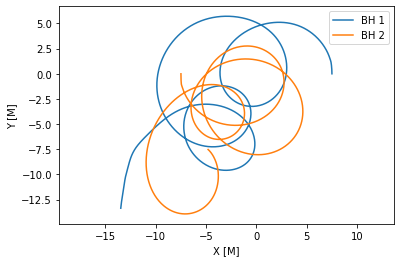

In [2]:
trajectory.plot2d()

In [3]:
# trajectory.r.preview()

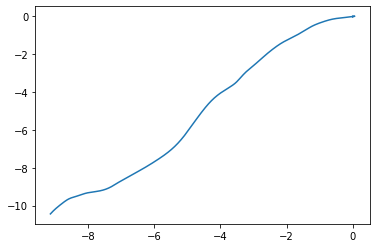

In [4]:
import matplotlib.pyplot as plt

com = trajectory.CoM(bbh.m1, bbh.m2).y
plt.plot(com[:,0], com[:,1])

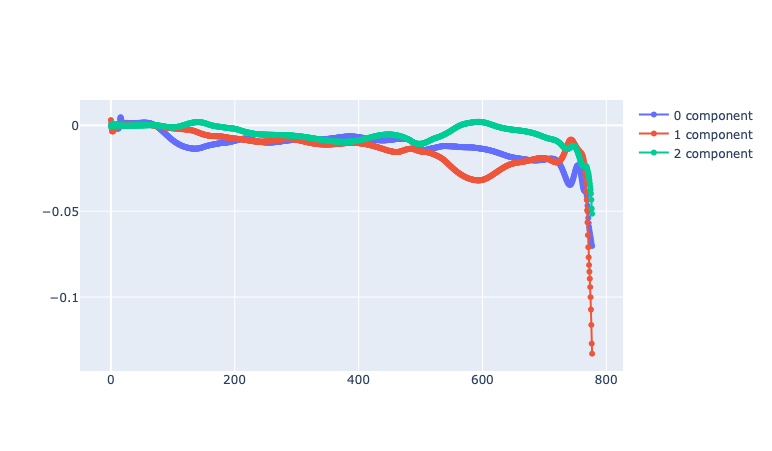

In [7]:
trajectory.CoM(bbh.m1, bbh.m2).gradient().preview()

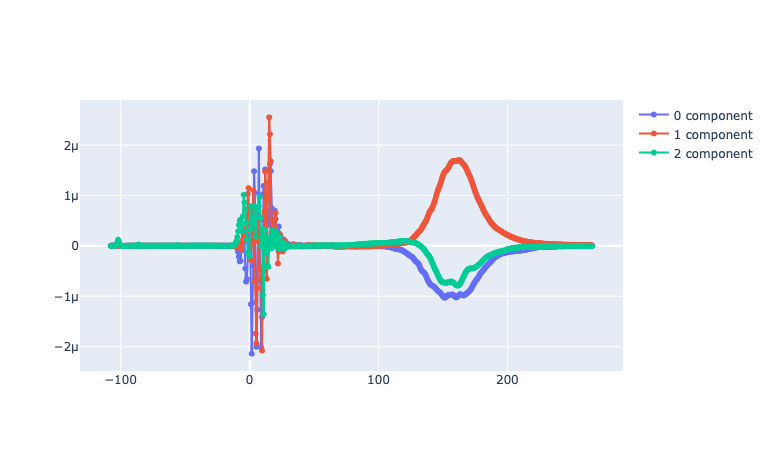

In [9]:
mp = sim.ThornOutput('multipole', ftype='h5')
mp.RadiatedLinMomFlux(M_ADM=bbh.ADMMass, f0=bbh.CutoffFrequency).preview()